# Compute condition number for random matrices and random kernel matrices

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from lib.kernels import exponential_kernel, linear_kernel

In [7]:
save_folder = 'fig/condition_number/'
!mkdir -p $save_folder

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

## Linear models

In [24]:
def condition_number_linear(p, n, rng):
    '''p is the number of free parameters, n is the number of equations'''
    A = rng.standard_normal((p, n))
    singular_values = np.linalg.svd(A, compute_uv=False, hermitian=False)
    return singular_values[0]/singular_values[-1]

def condition_number_kernel(d, n, rng, kernel=exponential_kernel):
    '''d is the dimensionality of the space, n is the number of data points
    Resulting kernel matrix is n x n'''
    aux = rng.standard_normal((n, d))
    K = kernel(aux, aux)
#     A = np.matmul(aux.T, aux) / d
    singular_values = np.linalg.svd(K, compute_uv=False, hermitian=False)
    return singular_values[0]/singular_values[-1]

In [15]:
rng = np.random.default_rng(seed=0)

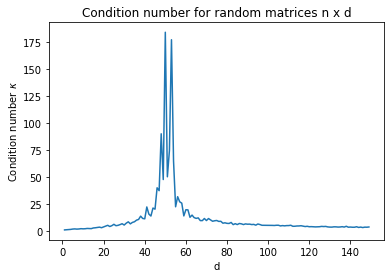

In [17]:
n = 50
span = range(1, 3*n)
c_number = []
for p in span:
    c_number.append(condition_number_linear(p, n, rng))
    
plt.plot(span, c_number)
plt.xlabel('d')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random matrices n x d')
plt.savefig(f'{save_folder}/condition_number_vs_d.pdf', bbox_inches='tight')

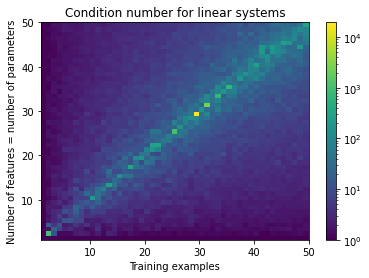

In [18]:
n_max = 50
p_max = 50

c_numbers = np.zeros(shape=(p_max-1, n_max-1))
for n in range(1, n_max):
    for p in range(1, p_max):
        c_numbers[p-1, n-1] = condition_number_linear(p, n, rng)
        
plt.pcolor(range(1, n_max+1), range(1, p_max+1), c_numbers, norm=LogNorm())
plt.xlabel('Training examples')
plt.ylabel('Number of features = number of parameters')
plt.title('Condition number for linear systems')
plt.colorbar()
plt.savefig(f'{save_folder}/condition_number_nd.pdf', bbox_inches='tight')

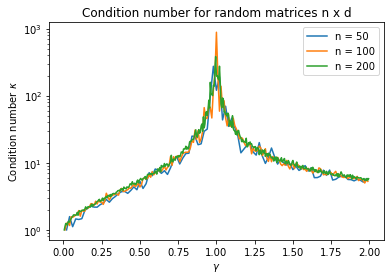

In [19]:
n_s = [50, 100, 200]

for n in n_s:
    span = np.array(range(1, 2*n))
    c_number = []
    for p in span:
        c_number.append(condition_number_linear(p, n, rng))
    
    plt.plot(span/n, c_number, label=f'n = {n}')
plt.legend()
plt.xlabel(r'$\gamma$')
plt.yscale('log')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random matrices n x d')
plt.savefig(f'{save_folder}/condition_number_vs_gamma.pdf', bbox_inches='tight')

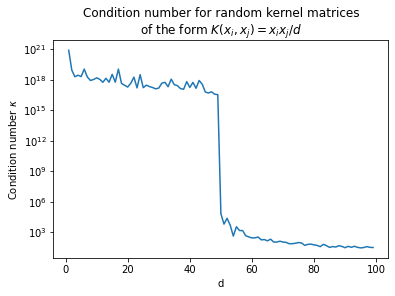

In [25]:
n = 50
span = range(1, 100)
c_number = []
for p in span:
    c_number.append(condition_number_kernel(p, n, rng, kernel=linear_kernel))
    
plt.plot(span, c_number)
plt.xlabel('d')
# plt.ylim(bottom=0)
plt.yscale('log')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = x_i x_j / d$')
plt.savefig(f'{save_folder}/condition_number_simple_kernel.pdf', bbox_inches='tight')

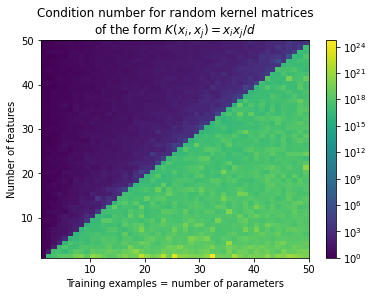

In [26]:
n_max = 50
p_max = 50

c_numbers = np.zeros(shape=(p_max-1, n_max-1))
for n in range(1, n_max):
    for p in range(1, p_max):
        c_numbers[p-1, n-1] = condition_number_kernel(p, n, rng, kernel=linear_kernel)
        
plt.pcolor(range(1, n_max+1), range(1, p_max+1), c_numbers, norm=LogNorm())
plt.xlabel('Training examples = number of parameters')
plt.ylabel('Number of features')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = x_i x_j / d$')
plt.colorbar()
plt.savefig(f'{save_folder}/condition_number_simple_kernel_nd.pdf', bbox_inches='tight')

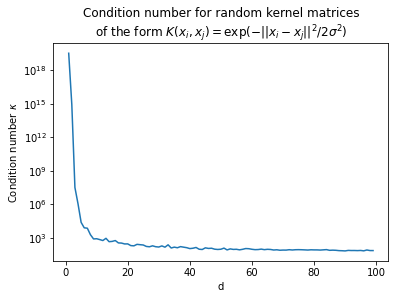

In [31]:
n = 50
span = range(1, 100)
c_number = []
for p in span:
    c_number.append(condition_number_kernel(p, n, rng, kernel=exponential_kernel))
    
plt.plot(span, c_number)
plt.xlabel('d')
# plt.ylim(bottom=0)
plt.yscale('log')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = \exp(-||x_i - x_j||^2/2\sigma^2)$')
plt.savefig(f'{save_folder}/condition_number_expo_kernel.pdf', bbox_inches='tight')

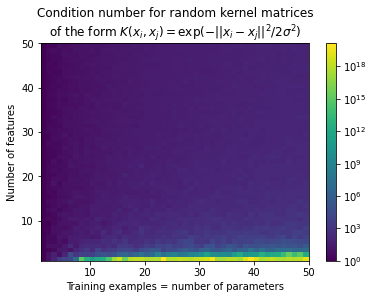

In [32]:
n_max = 50
p_max = 50

c_numbers = np.zeros(shape=(p_max-1, n_max-1))
for n in range(1, n_max):
    for p in range(1, p_max):
        c_numbers[p-1, n-1] = condition_number_kernel(p, n, rng, kernel=exponential_kernel)
        
plt.pcolor(range(1, n_max+1), range(1, p_max+1), c_numbers, norm=LogNorm())
plt.xlabel('Training examples = number of parameters')
plt.ylabel('Number of features')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = \exp(-||x_i - x_j||^2/2\sigma^2)$')
plt.colorbar()
plt.savefig(f'{save_folder}/condition_number_expo_kernel_nd.pdf', bbox_inches='tight')